In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Plotting Function
def plot_polygon(points, title, color='b', show=True):
    points = np.vstack([points, points[0]])
    plt.plot(points[:, 0], points[:, 1], color=color, marker='o', linestyle='-')
    plt.title(title)
    plt.grid(True)
    plt.axis('equal')
    if show:
        plt.show()

# Apply Transformation
def apply_transformation(points, transformation_matrix):
    # Convert points to homogeneous coordinates (add 1 as the third coordinate)
    ones = np.ones((points.shape[0], 1))
    homogeneous_points = np.hstack((points, ones))

    # Apply transformation
    transformed_points = homogeneous_points @ transformation_matrix.T

    # Return transformed points in 2D
    return transformed_points[:, :2]

In [ ]:
def translate(tx, ty):
    return np.array([[1, 0, tx],
                     [0, 1, ty],
                     [0, 0, 1]])
def scale(sx, sy):
    return np.array([[sx, 0, 0],
                     [0, sy, 0],
                     [0, 0, 1]])

def rotate(angle):
    rad = np.radians(angle)
    return np.array([[np.cos(rad), -np.sin(rad), 0],
                     [np.sin(rad), np.cos(rad), 0],
                     [0, 0, 1]])

def reflect(axis):
    if axis == 'x':
        return np.array([[1, 0, 0],
                         [0, -1, 0],
                         [0, 0, 1]])
    elif axis == 'y':
        return np.array([[-1, 0, 0],
                         [0, 1, 0],
                         [0, 0, 1]])
    elif axis == 'origin':
        return np.array([[-1, 0, 0],
                         [0, -1, 0],
                         [0, 0, 1]])

def shear(shx, shy):
    return np.array([[1, shx, 0],
                     [shy, 1, 0],
                     [0, 0, 1]])

In [ ]:
# Function to get user-defined polygon coordinates
def get_polygon():
    print("Choose a shape to create:")
    print("1. Rectangle")
    print("2. Triangle")
    print("3. Square")
    print("4. Rhombus")
    print("5. Exit")
    choice = int(input("Enter the number of your choice: "))

    if choice == 1:
        print("Enter coordinates for a rectangle (4 points):")
        points = [list(map(float, input(f"Enter x, y for point {i+1}: ").split())) for i in range(4)]
    elif choice == 2:
        print("Enter coordinates for a triangle (3 points):")
        points = [list(map(float, input(f"Enter x, y for point {i+1}: ").split())) for i in range(3)]
    elif choice == 3:
        print("Enter coordinates for a square (4 points):")
        points = [list(map(float, input(f"Enter x, y for point {i+1}: ").split())) for i in range(4)]
    elif choice == 4:
        print("Enter coordinates for a rhombus (4 points):")
        points = [list(map(float, input(f"Enter x, y for point {i+1}: ").split())) for i in range(4)]
    elif choice == 5:
        print("Exiting the Program!!")
        return None
    else:
        print("Invalid choice! Defaulting to a rectangle.")
        points = [[1, 1], [4, 1], [4, 3], [1, 3]]  # Default rectangle

    return np.array(points)

def main():
  while True:
    polygon = get_polygon()
    if polygon is None:
      break
    else:
      plot_polygon(polygon, "Original Polygon", color='black')

      # Apply transformations as before
      # Translation
      translation_matrix = translate(2, 3)
      translated_polygon = apply_transformation(polygon, translation_matrix)
      plot_polygon(translated_polygon, "Translated Polygon", color='green')

      # Scaling
      scaling_matrix = scale(2, 1.5)
      scaled_polygon = apply_transformation(polygon, scaling_matrix)
      plot_polygon(scaled_polygon, "Scaled Polygon", color='blue')

      # Rotation
      rotation_matrix = rotate(45)
      rotated_polygon = apply_transformation(polygon, rotation_matrix)
      plot_polygon(rotated_polygon, "Rotated Polygon (45°)", color='orange')

      # Reflection
      reflection_matrix = reflect('x')
      reflected_polygon = apply_transformation(polygon, reflection_matrix)
      plot_polygon(reflected_polygon, "Reflected Polygon (X-axis)", color='purple')

      # Shearing
      shearing_matrix = shear(1, 0.5)
      sheared_polygon = apply_transformation(polygon, shearing_matrix)
      plot_polygon(sheared_polygon, "Sheared Polygon", color='red')

      # Composite Transformation (Scaling + Rotation)
      composite_matrix = scale(1.5, 2) @ rotate(30)
      composite_polygon = apply_transformation(polygon, composite_matrix)
      plot_polygon(composite_polygon, "Composite Transformation (Scaling + Rotation)", color='cyan')

Choose a shape to create:
1. Rectangle
2. Triangle
3. Square
4. Rhombus
5. Exit
Enter coordinates for a rectangle (4 points):


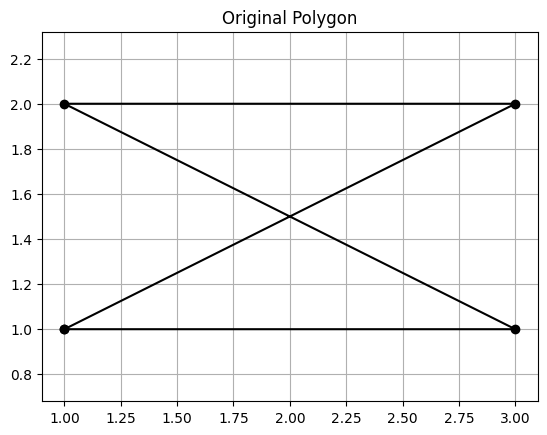

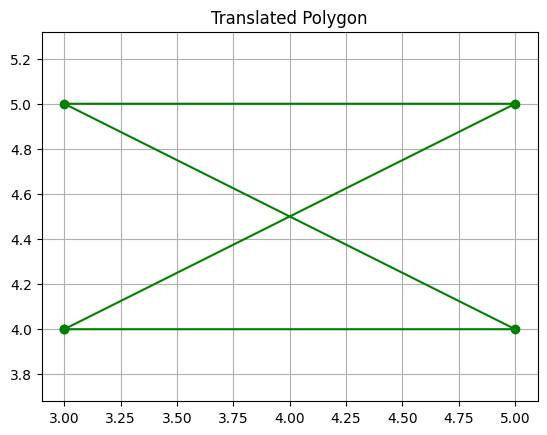

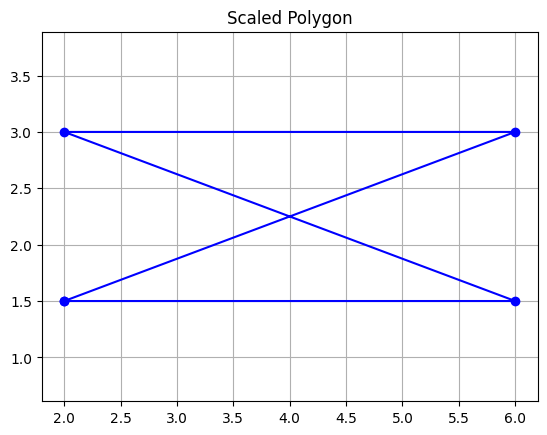

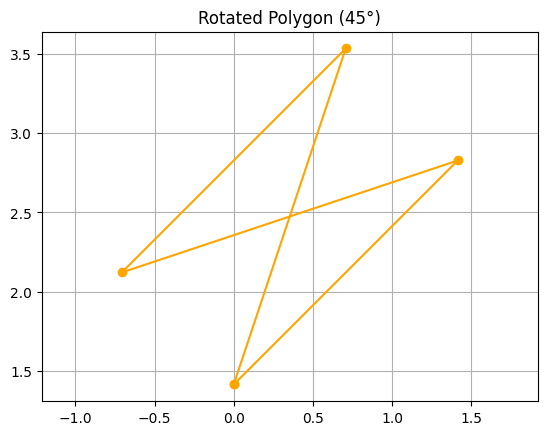

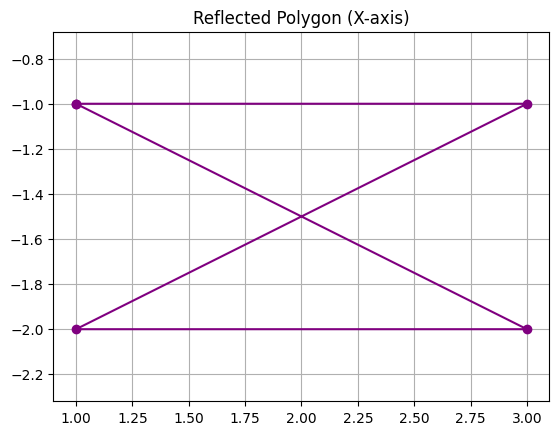

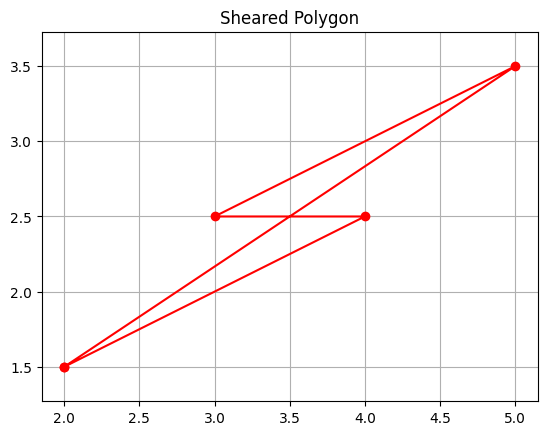

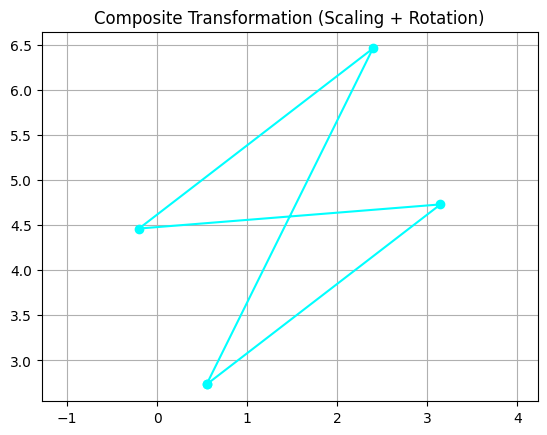

Choose a shape to create:
1. Rectangle
2. Triangle
3. Square
4. Rhombus
5. Exit
Enter coordinates for a square (4 points):


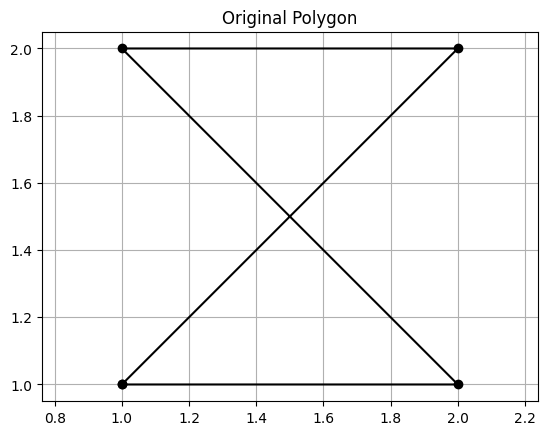

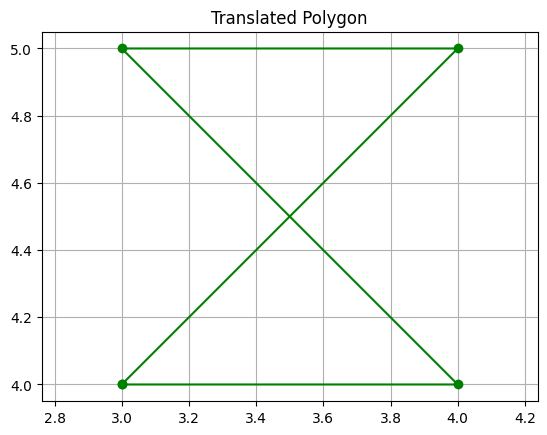

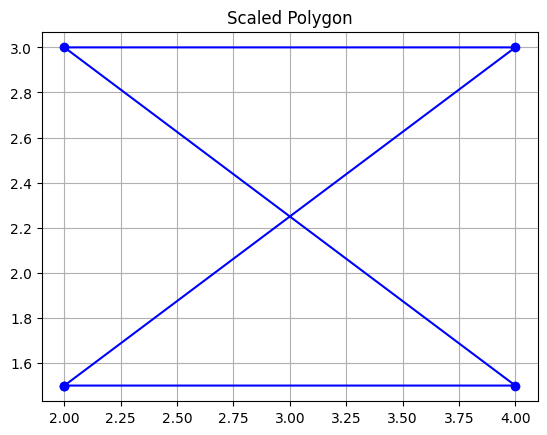

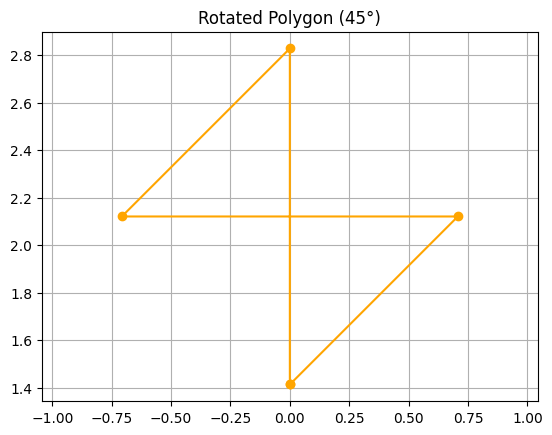

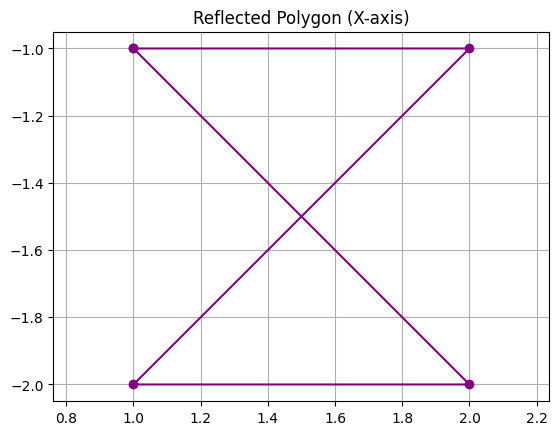

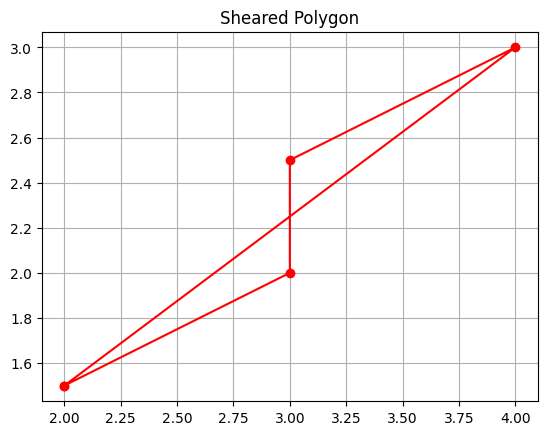

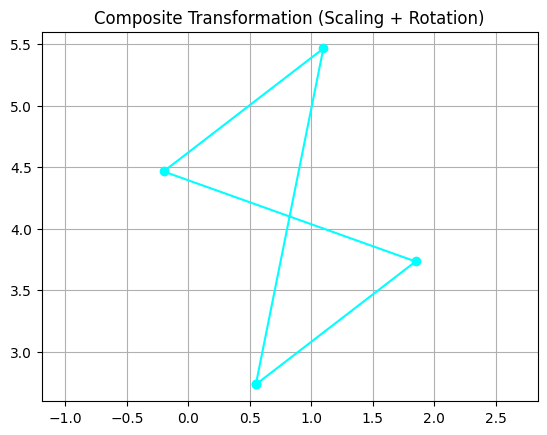

Choose a shape to create:
1. Rectangle
2. Triangle
3. Square
4. Rhombus
5. Exit


In [ ]:
if __name__ == "__main__":
    main()

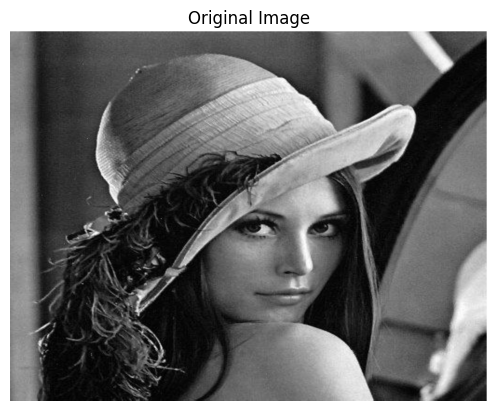

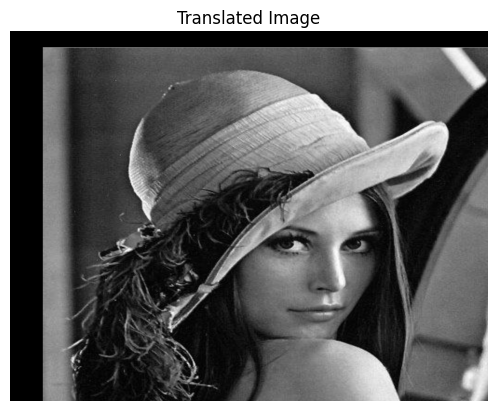

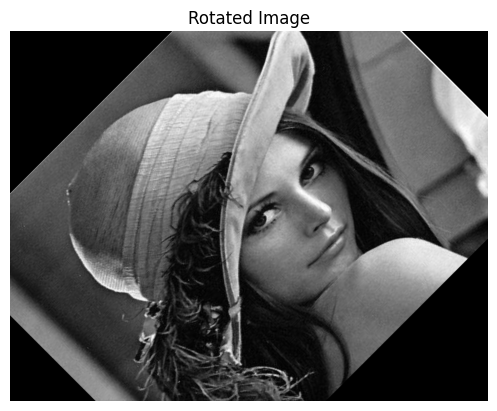

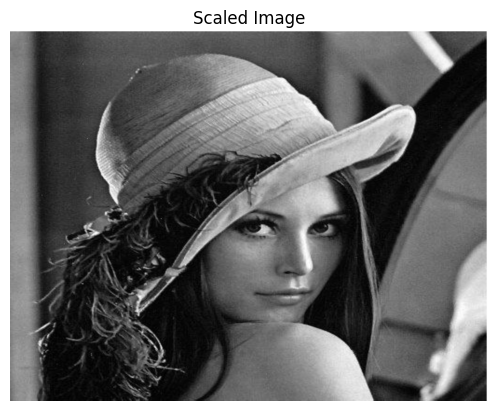

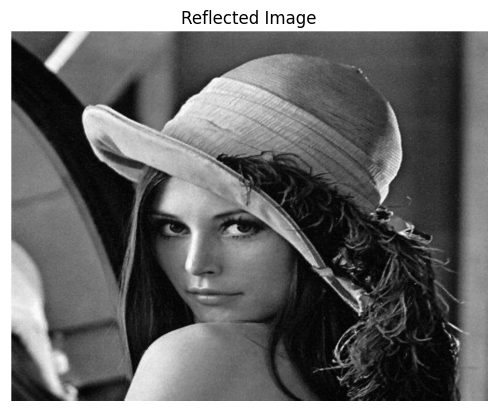

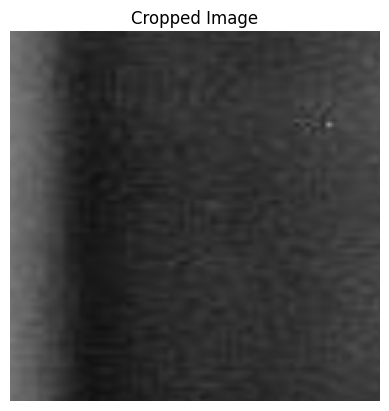

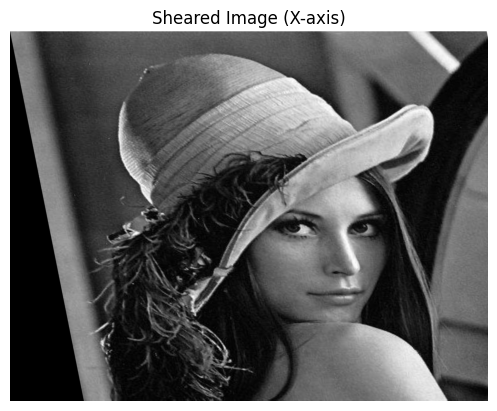

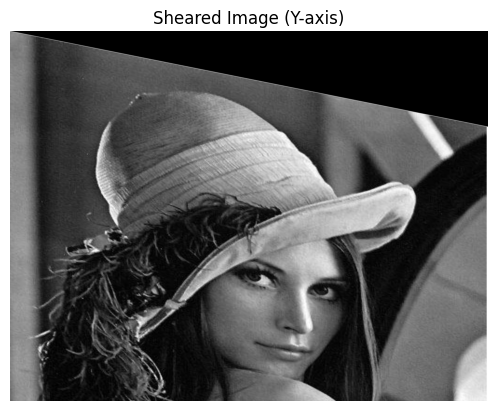

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread("/content/Screenshot 2025-01-31 at 8.56.27 AM.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


def display_image(title, img):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()


def translate_image(image, tx, ty):
    rows, cols = image.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(image, translation_matrix, (cols, rows))


def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    center = (cols // 2, rows // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, rotation_matrix, (cols, rows))


def scale_image(image, fx, fy):
    return cv2.resize(image, None, fx=fx, fy=fy)


def reflect_image(image, axis):
    if axis == "x":
        return cv2.flip(image, 0)
    elif axis == "y":
        return cv2.flip(image, 1)


def crop_image(image, x, y, width, height):
    return image[y:y + height, x:x + width]


def shear_image(image, shear_factor, axis="x"):
    rows, cols = image.shape[:2]
    if axis == "x":
        shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    else:
        shear_matrix = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    return cv2.warpAffine(image, shear_matrix, (cols, rows))


translated_image = translate_image(image, 100, 50)
rotated_image = rotate_image(image, 45)
scaled_image = scale_image(image, 1.5, 1.5)
reflected_image = reflect_image(image, "y")
cropped_image = crop_image(image, 50, 50, 200, 200)
sheared_image_x = shear_image(image, 0.2, "x")
sheared_image_y = shear_image(image, 0.2, "y")


display_image("Original Image", image)
display_image("Translated Image", translated_image)
display_image("Rotated Image", rotated_image)
display_image("Scaled Image", scaled_image)
display_image("Reflected Image", reflected_image)
display_image("Cropped Image", cropped_image)
display_image("Sheared Image (X-axis)", sheared_image_x)
display_image("Sheared Image (Y-axis)", sheared_image_y)
